In [ ]:
%qtconsole

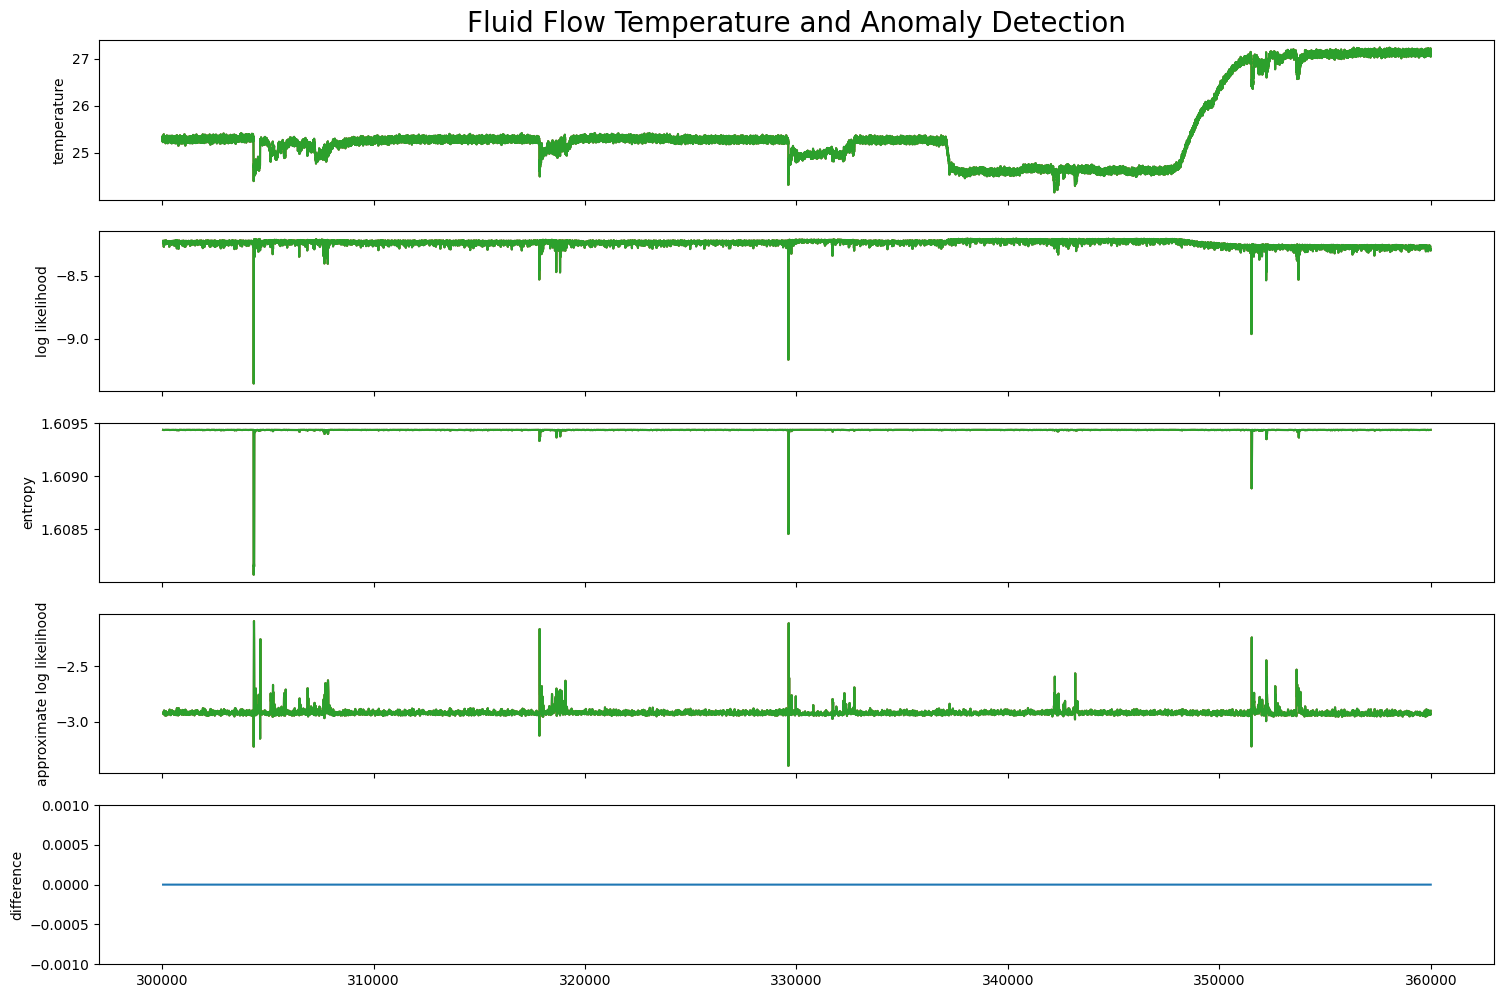

In [57]:
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

ds= [
        "ds00",
        "ds01",
        "ds02",
        "ds03",
        "ds04",
        "ds05",
        "ds06",
        "ds07"    
]

data_dir = "../data/test_output/"
g0 =    sorted(glob(data_dir + "/" + ds[idx] +'*alg-0*.csv'))
g1 =    sorted(glob(data_dir + "/" + ds[idx] +'*alg-1*.csv'))
g2 =    sorted(glob(data_dir + "/" + ds[idx] +'*alg-2*.csv'))

df0 = pd.DataFrame()
df1 = pd.DataFrame()
df2 = pd.DataFrame()

for f in g0:
    df0 = df0.append(pd.read_csv(f))
for f in g1:
    df1 = df1.append(pd.read_csv(f))
for f in g2:
    df2 = df2.append(pd.read_csv(f))

df0.set_index('x', inplace=True)   
df1.set_index('x', inplace=True)   
df2.set_index('x', inplace=True)   

calc0 = df0.dropna()
calc1 = df1.dropna()
calc2 = df2.dropna()

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, sharex=True)
fig.set_figheight(12)
fig.set_figwidth(18)
ax1.set_title("Fluid Flow Temperature and Anomaly Detection", fontsize=20)
ax1.plot(df0.index, df0['y'])
ax1.plot(df1.index, df1['y'])
ax1.plot(df1.index, df1['y'])
ax1.set_ylabel('temperature')

# share x only
ax2.plot(calc0.index, calc0['LL'])
ax2.plot(calc1.index, calc1['LL'])
ax2.plot(calc2.index, calc2['LL'])
ax2.set_ylabel('log likelihood')

ax3.plot(calc0.index, calc0['entropy'])
ax3.plot(calc1.index, calc1['entropy'])
ax3.plot(calc2.index, calc2['entropy'])
ax3.set_ylabel('entropy')

ax4.plot(calc0.index, calc0['approx_LL'])
ax4.plot(calc1.index, calc1['approx_LL'])
ax4.plot(calc2.index, calc2['approx_LL'])
ax4.set_ylabel('approximate log likelihood')

ax5.plot(calc0.index, calc0['approx_LL'] - calc2['approx_LL'])
ax5.set_ylim([-0.001, 0.001])
ax5.set_ylabel('difference')

plt.show()

In [ ]:
x, y, LL, entropy, approx_LL = df.index,df['y'], df['LL'], df['entropy'], df['approx_LL']
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(y)
plt.tight_layout()
plt.title(f)
plt.show()